**IMPORT LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model

**LOAD DATA**

In [ ]:
data = pd.read_csv('/content/bmi_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24950 entries, 0 to 24949
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             24950 non-null  int64  
 1   Height(Inches)  24950 non-null  float64
 2   Weight(Pounds)  24950 non-null  float64
 3   BMI             24950 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 779.8 KB


In [ ]:
data_raw = pd.read_csv('/content/bmi_data.csv')
data_raw.isnull().sum()

Age               0
Height(Inches)    0
Weight(Pounds)    0
BMI               0
dtype: int64

In [ ]:
data.isnull().sum()

Age               0
Height(Inches)    0
Weight(Pounds)    0
BMI               0
dtype: int64

In [ ]:
data.describe()

,Age,Height(Inches),Weight(Pounds),BMI
count,24950.000000,24950.000000,24950.000000,24950.000000
mean,26.497836,67.992821,127.077390,19.321368
std,5.190667,1.901551,11.663509,1.552091
min,18.000000,60.278360,78.014760,13.070879
25%,22.000000,66.704955,119.307525,18.278339
50%,27.000000,67.995700,127.152500,19.302160
75%,31.000000,69.271823,134.893550,20.357547
max,35.000000,75.152800,170.924000,26.023756


**PREPARE** **DATA**

In [ ]:
A = data.drop('BMI', axis='columns')
b = data['BMI']
b = np.array([b]).T
print(b.shape)

(24950, 1)


In [ ]:
Age = data['Age']
Age = np.array([Age]).T

Height = data['Height(Inches)']
Height = np.array([Height]).T

Weight = data['Weight(Pounds)']
Weight = np.array([Weight]).T

ones = np.ones((24950,1), dtype=np.int8)

new_A = np.concatenate((ones,Age,Height,Weight), axis= 1)

x = np.linalg.inv(new_A.T.dot(new_A)).dot(new_A.T).dot(b)
print(x)

NameError: ignored

In [ ]:
Height = data['Height(Inches)']
Height = np.array([Height]).T
print(Height.shape)

(24950, 1)


In [ ]:
Weight = data['Weight(Pounds)']
Weight = np.array([Weight]).T
print(Weight.shape)

(24950, 1)


In [ ]:
print(A.shape)

(24950, 3)


**ADD 1 ARRAY**

In [ ]:
ones = np.ones((24950,1), dtype=np.int8)
print(ones.shape)

(24950, 1)


In [ ]:
new_A = np.concatenate((ones,Age,Height,Weight), axis= 1)
new_A.T
print(new_A)
print(new_A.shape)

[[  1.       21.       65.78331 112.9925 ]
 [  1.       35.       71.51521 136.4873 ]
 [  1.       27.       69.39874 153.0269 ]
 ...
 [  1.       23.       64.69855 118.2655 ]
 [  1.       20.       67.52918 132.2682 ]
 [  1.       34.       68.87761 124.8742 ]]
(24950, 4)


In [ ]:
print(new_A.T.shape)
print(new_A.shape)
print(b.shape)

(4, 24950)
(24950, 4)
(24950, 1)


**FIND VALUES OF X MATRIX**

In [ ]:
import numpy as np

# Assuming your response variable is stored in the variable Y
Y_transformed = np.log(b)
print(Y_transformed)

# Now you can use Y_transformed as the transformed response variable in your analysis

[[2.91004618]
 [2.93186831]
 [3.10633335]
 ...
 [2.98891157]
 [3.01516913]
 [2.91810156]]


In [ ]:
x = np.linalg.inv(new_A.T.dot(new_A)).dot(new_A.T).dot(b)
print(x)

[[ 3.86644294e+01]
 [-8.03861665e-05]
 [-5.69622928e-01]
 [ 1.52578978e-01]]


**APPLY VALUES OF X MATRIX TO FORMULA**

In [ ]:
x0 = np.array([[18,35]]).T
x1 = np.array([[60.27836,75.1528]]).T
x2 = np.array([[78.01476,170.924]]).T
y0 = x[0][0] + x0*x[1][0] + x1*x[2][0] + x2*x[3][0]

**PREDICT BMI VALUES**

In [ ]:
x0_test = data['Age']
x1_test = data['Height(Inches)']
x2_test = data['Weight(Pounds)']
y0_pred = x[0][0] + x0_test*x[1][0] + x1_test*x[2][0] + x2_test*x[3][0]
print(y0_pred)

0        18.431340
1        18.750005
2        22.479834
3        21.522151
4        22.066196
           ...    
24945    17.080678
24946    20.233126
24947    19.853632
24948    20.377999
24949    18.480608
Length: 24950, dtype: float64


**EVALUATION PREDICTED VALUES**

In [ ]:
Y_true = data['BMI']
Y_pred = y0_pred
y_eva = np.column_stack((Y_true, y0_pred))
y_eva

array([[18.35764628, 18.43133984],
       [18.76265227, 18.75000535],
       [22.33898483, 22.47983355],
       ...,
       [19.86405006, 19.85363219],
       [20.39253963, 20.37799926],
       [18.50612131, 18.48060824]])



> Mean square error



In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_true, y0_pred)
print("MSE:", mse)

MSE: 0.007621383135712939


In [ ]:
def MSE(Y_true,Y_pred, n):
    # Calculate R-squared
    ssr = np.sum((y0_pred - data['BMI'])**2)
    mse = ssr / n
    return mse
n = 24950 # the sample size (n)
mse = MSE(data['BMI'], y0_pred, n)
print("MSE: ", mse)

MSE:  0.007621383135712939




> Root mean squared error



In [ ]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.0873005334216976




> Mean Absolute Error



In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_pred, Y_true)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.05535295339235638


In [ ]:
def mean_absolute_error(Y_true, Y_pred):
    n = len(Y_true)
    absolute_errors = [abs(Y_true[i] - Y_pred[i]) for i in range(n)]
    mae = sum(absolute_errors) / n
    return mae
mae = mean_absolute_error(Y_true, Y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.05535295339235637



> R-squared



In [ ]:
from sklearn.metrics import r2_score
# assuming y_test and y_pred are your true and predicted target values
r_squared = r2_score(data['BMI'], y0_pred)
print("R-squared:", r_squared)

R-squared: 0.9968361430361496


In [ ]:
def r2_score(Y_true, Y_pred,n):
    y_mean = sum(Y_true) / n
    tss = sum((Y_true[i] - y_mean)** 2 for i in range(n))
    rss = sum((Y_true[i] - Y_pred[i])** 2 for i in range(n))
    r2 = 1 - (rss/ tss)
    return r2
n = 24950
r2 = r2_score(Y_true, Y_pred,n)
print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.9968361430361498


In [ ]:
 r_squared = 0.9968361430361496
 n = 24950
 k = 3
 adj_r_squared = 1 - (((1 - r_squared) * (n - 1)) / (n - k - 1))
 print(adj_r_squared)

0.9968357625514671




**Adjusted R2 score**


In [ ]:
def adj_r_squared(Y_true, Y_pred, n, k):
    # Calculate R-squared
    ssr = np.sum((data['BMI'] - y0_pred)**2)
    sst = np.sum((data['BMI'] - np.mean(y0_pred))**2)
    r_squared = 1 - (ssr / sst)
    adj_r_squared = 1 - (((1 - r_squared**2) * (n - 1)) / (n - k - 1))
    return adj_r_squared
n = 24950 # the sample size (n)
k = 3  # number of independent variables (k)
adj_r_squared = adj_r_squared(data['BMI'], _pred, n, k)
adj_r_squared

0.993681536297621



> **PREDICT DATA COLLECTION**




In [ ]:
dt_collected = pd.read_csv("/content/bmi_datacollection.csv")
x0_test = dt_collected['Age']
x1_test = dt_collected['Height (inches)']
x2_test = dt_collected['Weight (pounds)']
y1_pred = x[0][0] + x0_test*x[1][0] + x1_test*x[2][0] + x2_test*x[3][0]
print(y1_pred)

0      23.188012
1      22.515018
2      22.515179
3      22.515018
4      26.439616
         ...    
100    21.617220
101    20.945235
102    17.357325
103    24.533553
104    21.057489
Length: 105, dtype: float64


Text(0, 0.5, 'Predicted values')

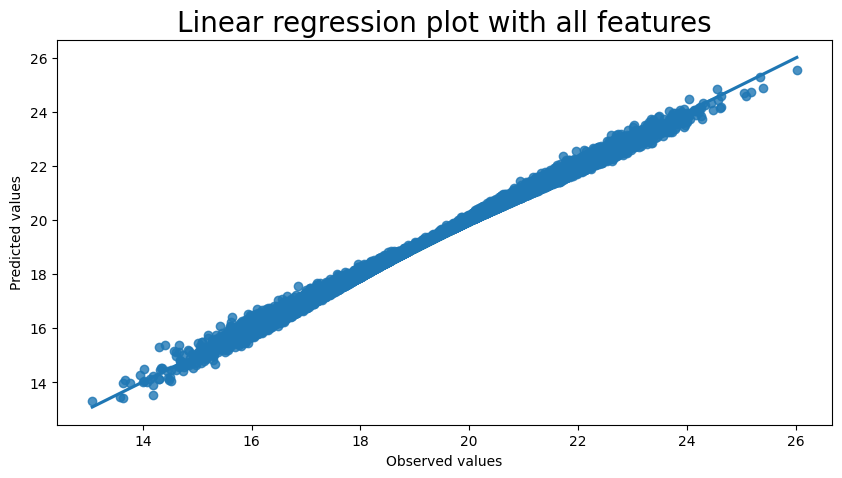

In [ ]:
from sklearn.linear_model import LinearRegression
import seaborn as sns
plt.figure(figsize = (10,5))
sns.regplot(x=data['BMI'],y=y0_pred)
plt.title('Linear regression plot with all features', fontsize = 20)
plt.xlabel('Observed values')
plt.ylabel('Predicted values')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

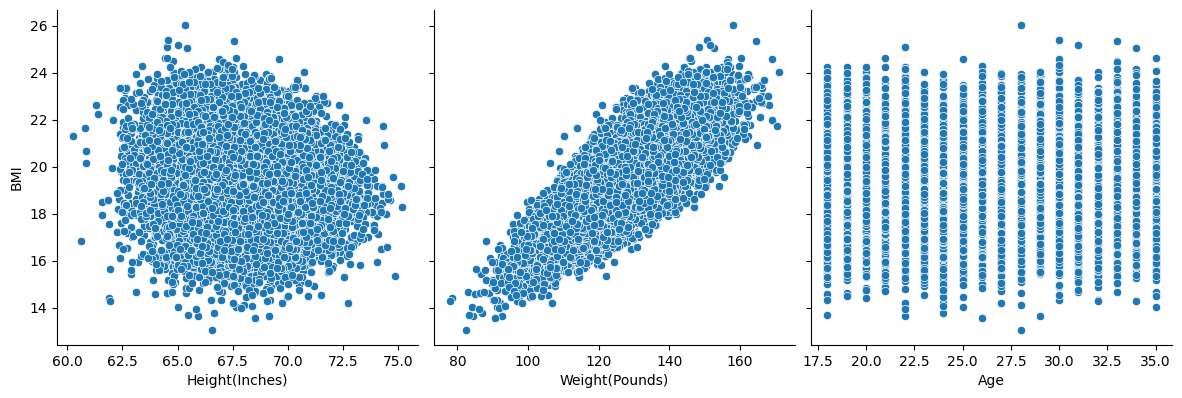

In [ ]:
sns.pairplot(data, x_vars=['Height(Inches)', 'Weight(Pounds)', 'Age'], y_vars='BMI',size=4, aspect=1, kind='scatter')
plt.show

<Axes: >

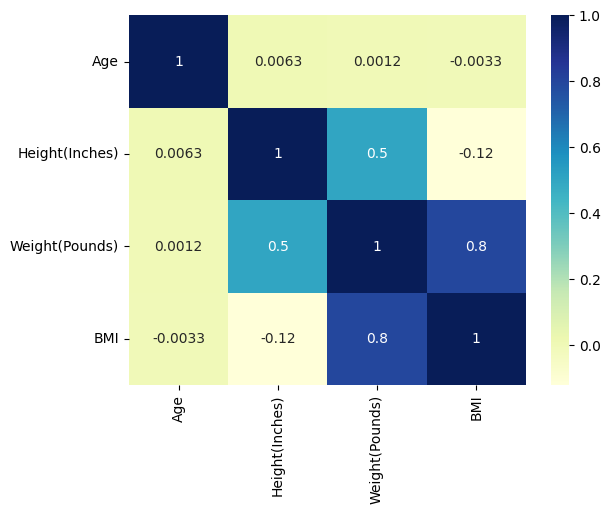

In [ ]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)

**TEST AT A DATAPOINT**

In [ ]:
x0_test = 21
x1_test = 72.0471
x2_test = 174.16498

y_pred = x[0][0] + x0_test*x[1][0] + x1_test*x[2][0] + x2_test*x[3][0]
print(y_pred)

24.196975930745907


**SHOW RESULT AT A DATAPOINT**

In [ ]:
for i in range(107):

 if y1_pred[i]<18.5:
  print("Your BMI is ", y1_pred[i])
  print("Your BMI value shows you are low weight(thin).\n")
 elif y1_pred[i]>18.5 and y1_pred[i]<22.9:
  print("Your BMI is ", y1_pred[i])
  print("Your BMI value shows you are at normal level.\n")
 elif y1_pred[i]==23:
  print("Your BMI is ", y1_pred[i])
  print("Your BMI value shows you are overweight.\n")
 elif y1_pred[i]>23 and y1_pred[i]<24.9:
  print("Your BMI is ", y1_pred[i])
  print("Your BMI value shows you are pre-obesity.\n")
 elif y1_pred[i]>25 and y1_pred[i]<29.9:
  print("Your BMI is ", y1_pred[i])
  print("Your BMI value shows you are obesity at the first level.\n")
 elif y1_pred[i]>=30 and y1_pred[i]<40:
  print("Your BMI is ", y1_pred[i])
  print("Your BMI value shows you are obesity at the second level.\n")
 else:
  print("Your BMI is ", y1_pred[i])
  print("Your BMI value shows you are obesity at the third level.\n")

#https://medlatec.vn/tin-tuc/cach-tinh-va-y-nghia-cua-chi-so-bmi-trong-danh-gia-tinh-trang-co-the-s195-n18722#:~:text=D%C6%B0%E1%BB%9Bi%20%C4%91%C3%A2y%20l%C3%A0%20b%E1%BA%A3ng%20th%E1%BB%91ng,%2C5%20%2D%2022%2C9.

Your BMI is  23.188011931584352
Your BMI value shows you are pre-obesity.

Your BMI is  22.515018469332325
Your BMI value shows you are at normal level.

Your BMI is  22.515179241665408
Your BMI value shows you are at normal level.

Your BMI is  22.515018469332325
Your BMI value shows you are at normal level.

Your BMI is  26.43961578857178
Your BMI value shows you are obesity at the first level.

Your BMI is  18.03018299955884
Your BMI value shows you are low weight(thin).

Your BMI is  18.478481330249785
Your BMI value shows you are low weight(thin).

Your BMI is  18.478691802519034
Your BMI value shows you are low weight(thin).

Your BMI is  23.41232845111858
Your BMI value shows you are pre-obesity.

Your BMI is  29.69118315164955
Your BMI value shows you are obesity at the first level.

Your BMI is  32.49438346123974
Your BMI value shows you are obesity at the second level.

Your BMI is  22.739514780601613
Your BMI value shows you are at normal level.

Your BMI is  19.263401400622

KeyError: ignored

**EVALUATE AT A DATAPOINT**